#                           Capstone Project - Credit Default Risk

#                                     By Abhiram Mannam

## TABLE OF CONTENTS


    1. INTRODUCTION


    2. DATA EXPLORATION
    
        2.1 Loading Libraries
    
        2.2 Loading the Dataset
    
        2.3 Explore the Dataset
    
    
    3. MAJORITY CLASS OF TARGET VARIABLE


    4. DATASET CLEANING AND IMPUTING


    5. CORRELATION


    6. HYPOTHESIS


    7. CLEAN THE TEST DATASET


    8. TRANSACTIONAL DATA ANALYSIS


    9. CONCLUSION



## 1. Introduction

Home Credit Default Risk - Exploration + Baseline Model. Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

In this notebook, we will take an initial look at the Home Credit default risk Exploration Data Analysis with data cleaning and explorations along with hypothesis questions and visualizations.

In this EDA we will be using Application (Train/ Test) dataset along with Bureau dataset and perform the hypothesis test and clean the datasets along with transactional data analysis with the bureau dataset. We will also visualize some of the plot depending on the hypothesis questions like does men or women tend to default more, deos income or credit sum have effect on the default along with client's region and occupation and family structure have an effect on the default.

## 2. Data Exploration

###  2.1 Loading Libraries

In [1]:
# Loading the numpy for pandas support as np. 
# Pandas for dataframe support as pd and matplotlib and seaborn for visualizations.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Loading the Dataset

In [2]:
# Loading the application_train.csv to data.
data=pd.read_csv("application_train.csv")

### 2.3 Explore the Dataset

In [3]:
# head provides the first 5 rows of the dataset.
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Tail provides the last 5 rows of the dataset.
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


From the head() and tail() functions from the dataset we can see that there are 122 columns with 307511 rows. And some of the important columns are SK_ID_CURR which is loan application id and TARGET which is the target (default) variable.

In [5]:
# Provides if any duplicated rows are present.
data.duplicated().sum()

0

No duplicated row are available. All rows are unique.

In [6]:
# Provides rows and columns of the dataset and also their dtypes.
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


We can see that the dataset has 307511 rows and 122 columns. In the dataset 65 columns are of float type and 41 columns are of int64 type and 16 columns are of object type.

In [7]:
# Outputs the column names.
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Here we can see the names of the 122 columns. Some of the column names are CODE_GENDER which provides gender of applicant and CNT_CHILDREN which provides number of children to the applicant and AMT_INCOME_TOTAL which provides the income of the applicant. 

FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, .... FLAG_DOCUMENT_20 ,FLAG_DOCUMENT_21 :These features are binary flags indicating the presence or absence of specific documents in the applicant's file. Each flag represents a different type of document (e.g., identification documents, income documents, etc.)

AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR represent the number of inquiries or requests made to the Credit Bureau by the applicant within specific time intervals. Each feature corresponds to a different time unit (hour, day, week, month, quarter, year).

In [8]:
# Provide data type of every column in the dataset.
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

As mentioned above the dataset has int64, float64 along with object type columns.

## 3. Majority Class of Target Variable

In [9]:
# Counts of TARGET column with default or no default.
target = data.TARGET.value_counts()
target

0    282686
1     24825
Name: TARGET, dtype: int64

As we see that 0 (no-default) has 282686 where as 1 (default) has 24825. This is an perfect example of the class imbalance as majority of the target variable has only one class. There are far more loans that were repaid on time than loans that were not repaid.This may affect the model and results in biased predictions toward the non default 

In [10]:
# Calculating the percentage of target class.
percenttarget=(target.values/len(data)*100)
percenttarget

array([91.92711805,  8.07288195])

We can see that 0 (no-default) has 91.927% where as 1 (default) has 8.072% and the majority class classifier has 91.927% accuracy for the 0 (no-default) classifier.

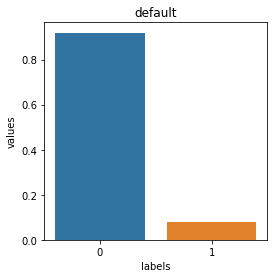

In [11]:
# Plotting the target class.
df_plot = pd.DataFrame({'labels': target.index,
                   'values': target.values/len(data)})
plt.figure(figsize = (4,4))
plt.title('default')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df_plot)
locs, labels = plt.xticks()
plt.show()

We can see the 0 has more than 90% whereas 1 has less than 10% and this shows class imbalance.

## 4. Dataset Cleaning and Imputing

Let take a look at the numeric and object columns and summarize them.

In [12]:
# Summary of the all numeric columns
numeric_cols = data.select_dtypes(exclude=['object']).columns
numeric_summary = data[numeric_cols].describe()
numeric_summary

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


We can see that there are some outliers for the numeric type columns like maximum number of children are 19 and maximum AMT_INCOME_TOTAL is 117000000 which are considerable for those columns but the DAYS_EMPLOYED maximum value is 365243 days which is equal to 243 years which is not possible. We will look more on outliers at later stage.

Let's Summarize object type columns.

In [13]:
# Unique values in categorical values.
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_values = data[col].unique()
    print(f"\nUnique values in {col}:")
    print(unique_values)


Unique values in NAME_CONTRACT_TYPE:
['Cash loans' 'Revolving loans']

Unique values in CODE_GENDER:
['M' 'F' 'XNA']

Unique values in FLAG_OWN_CAR:
['N' 'Y']

Unique values in FLAG_OWN_REALTY:
['Y' 'N']

Unique values in NAME_TYPE_SUITE:
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Unique values in NAME_INCOME_TYPE:
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Unique values in NAME_EDUCATION_TYPE:
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Unique values in NAME_FAMILY_STATUS:
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Unique values in NAME_HOUSING_TYPE:
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

Unique values in OCCUPATION_TYPE:
['Laborers' 'Core staff' 'Accountants' 'Managers

We can see there are some nan (null) values in some of the columns. And unknown, not specified, XNA and others are not null values. They are values that are unique to that column and or unknown at that time or not applicable to those applicants.

Let's clean nan (null) values.

In [14]:
# Calculating percentage of missing values in the columns.
missingdata=(data.isna().sum()/len(data))
missingdata.sort_values(ascending=False)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 122, dtype: float64

We can see that some columns have around 69% null and those columns wouldn't provide any information to the model. Let's deceide 45% as the cutoff when more than 45% values are null then can't provide variation for those columns.

Let's remove the columns whose null values make upto 45% of the data.

In [15]:
# Numeric Columns which have more than 45% of missing values.
application_train_numeric= data.select_dtypes(include=['number'])
missings=application_train_numeric.loc[:,application_train_numeric.isna().mean() >= 0.45]
highly_missing_features_numeric = missings.columns
missings.columns

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'TO

In [16]:
# Dropping the columns
data=data.drop(highly_missing_features_numeric,axis=1)
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


After dropping we can see that we have 77 columns remaining.

Let's drop object type columns.

In [17]:
# Object columns which have more than 45% of missing values.
application_train_object= data.select_dtypes(include=['object'])
missings=application_train_object.loc[:,application_train_object.isna().mean() >= 0.45]
highly_missing_features_object = missings.columns
missings.columns

Index(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [18]:
# Dropping the object columns.
data=data.drop(highly_missing_features_object,axis="columns")
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that after dropping the numeric and object type columns we finally have 73 columns.

Next, we have nan (nulls) to impute or remove. Before that let's see whether we have outliers or not.

In [19]:
outliers={}
for i in data.columns:
  if data[i].dtype != 'object':
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    # identify outliers
    threshold = 1.5
    outliers[i] = data[(data[i] < Q1 - threshold * IQR) | (data[i] > Q3 + threshold * IQR)]
outliers;


So, we can see that there are outliers availbale for many columns. So, we need to impute the numeric type columns with median since mean is prone to the outliers. 

But for object type nan means null or missing values since XNA, others, unknown and not specified are present to mention the other categories for the applicant preferences. So, we need to impute object type column nan (null) with mode.

In [20]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode().iloc[0])
    else:
        data[column] = data[column].fillna(data[column].median())

In [21]:
missingdata=data.isna().sum()
missingdata.sort_values(ascending=False)

SK_ID_CURR                    0
REG_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_8               0
FLAG_DOCUMENT_7               0
FLAG_DOCUMENT_6               0
                             ..
FLAG_CONT_MOBILE              0
FLAG_WORK_PHONE               0
FLAG_EMP_PHONE                0
FLAG_MOBIL                    0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

Now, We can see the number of nan(nulls) are 0.

We know that DAYS_EMPLOYED has some outliers as mentioned above. So, let's remove some of the outliers from that column using the IQR (Inter Quartile Range).

In [22]:
def remove_outlier(col):
  Q1,Q3=col.quantile([.25,.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range



In [23]:
#for i in data.columns:
  #if data[i].dtype != 'object':
lowlevel,uplevel=remove_outlier(data['DAYS_EMPLOYED'])
data['DAYS_EMPLOYED']=np.where(data['DAYS_EMPLOYED']>uplevel,uplevel,data['DAYS_EMPLOYED'])
data['DAYS_EMPLOYED']=np.where(data['DAYS_EMPLOYED']<lowlevel,lowlevel,data['DAYS_EMPLOYED'])


In [24]:
data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      -1203.542428
std        2732.404969
min       -6466.500000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max        3417.500000
Name: DAYS_EMPLOYED, dtype: float64

In [25]:
data.to_csv(r'/Users/u1451275/Downloads/data.csv', index=False)

After removing the outliers we can see that the DAY_EMPLOYED has maximum value of 3417 days.

## 5. Correlation

Let's find the correlation between TARGET variable and the remaining columns in the dataset.

In [26]:
# Correlation between target to dataset columns.
data_newdata=data.select_dtypes(exclude=['object'])
correlation_data = data_newdata[data_newdata.columns[1:]].corr()['TARGET'][:]
correlation_data.sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032394
DEF_60_CNT_SOCIAL_CIRCLE       0.031401
FLAG_WORK_PHONE                0.028524
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.012161
OBS_30_CNT_SOCIAL_CIRCLE       0.009447
OBS_60_CNT_SOCIAL_CIRCLE       0.009337
CNT_FAM_MEMBERS                0.009308
DAYS_EMPLOYED                  0.008981
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709


We can see that DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH, REG_CITY_NOT_WORK_CITY have a positive correlation of around 0.05-0.07.

In [27]:
# Correlation between target to dataset columns.
corr_matrix=data_newdata.corr()
corr_matrix["TARGET"].sort_values(ascending=True)

EXT_SOURCE_2                  -0.160295
EXT_SOURCE_3                  -0.155892
AMT_GOODS_PRICE               -0.039623
REGION_POPULATION_RELATIVE    -0.037227
AMT_CREDIT                    -0.030369
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, Length: 61, dtype: float64

We can see EXT_SOURCE_2 and EXT_SOURCE_3 have strong negative correlation of -0.160 and -0.155 respectively.

## 6. Hypothesis

In [28]:
# Function for density plot.
def plot_data(df,feature):
   t1 = df.loc[df['TARGET'] != 0]
   t0 = df.loc[df['TARGET'] == 0]
   sns.set_style('whitegrid')
   sns.kdeplot(t1[feature], bw=0.5, color='red', label="TARGET/DEFAULT = 1") # Density plot for target 1
   sns.kdeplot(t0[feature], bw=0.5, label="default/target = 0") # Density plot for target 0
   plt.ylabel('Density plot', fontsize=12)
   plt.xlabel(feature, fontsize=12)
   plt.xticks(fontsize=12, rotation=90)  # Set the font size for x-axis labels
   plt.yticks(fontsize=12)  # Set the font size for y-axis labels  
   plt.legend()
   plt.show()


Let's start with asking some usefull questions, put hypothesis about the main causes of the default that we tend to test and answer them in order to identify trends, outliers, potential feature interactions, or nonlinear associations that may influence credit default predictions.

Does a large amout of credit leads to default ?

Does the low income of the applicant leads to default?

Does the number of children have an impact on the credit default ?

Does the age of the applicant have a negative impact to the repayment ?

Does the client have large family structure impact on the default?

Does the region where the client live have an impact on the repayment?


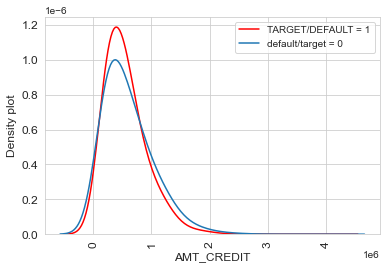

In [29]:
plot_data(data,'AMT_CREDIT') #Plotting for AMT_CREDIT vs TARGET.

For the first hypothesis question we can say that the large amount of credit is not the cause of defaulting and we can explain this by this plot we find that most of the defaulters have small credits less than one Million Dollar because Banks doesn't put in place complicated procedures to control the small loans as for big loans.

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

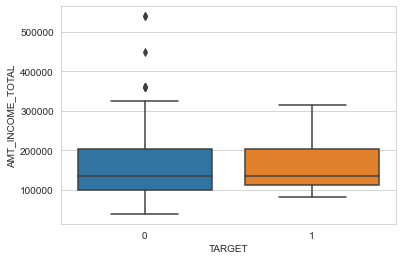

In [30]:
new_data=data.loc[:,['TARGET','AMT_INCOME_TOTAL']] 
new_data

#fig = plt.figure(figsize =(10, 7))
#ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
#bp = ax.boxplot(new_data)
 
# show plot
#plt.show()
sns.boxplot(data=new_data[1:100],x ='TARGET',y ='AMT_INCOME_TOTAL',)

For question two we can say fro the box plot that annual total income doesn't have a impact on the default or repayment as the two box plots look similar.

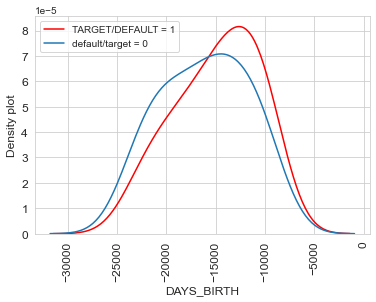

In [31]:
plot_data(data,'DAYS_BIRTH') # Plot for DAYS_BIRTH vs TARGET.

For the third and forth question The target == 1 curve skews towards the younger end of the range, younger peope are more likely to default. 

The distribution of the days_employed indicates that new employees are more likely to make default.

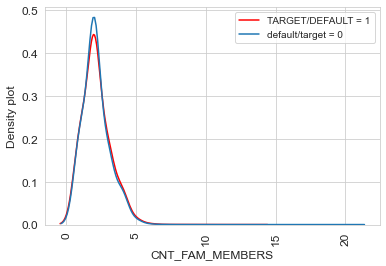

In [32]:
plot_data(data,'CNT_FAM_MEMBERS') # Plot for CNT_FAM_MEMBERS vs TARGET

For the fifth question the count of family numbers doen't have any effect on the target variable. As both target ==1 and target == 0 has the same density plot pattern.

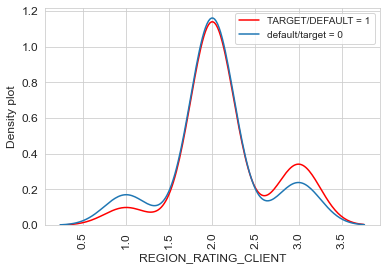

In [33]:
plot_data(data,'REGION_RATING_CLIENT') # Plot for REGION_RATING_CLIENT vs TARGET

For the sixth question the region rating of the client region has an effect on the repayment of loans. For right part from 2.5 to 4 of the region rating we can see there is high risk of default whereas for the region rating of 0 to 1.5 on the left side of the plot has less default risk.

Let's put hypothesis for the object type columns.

Does gender of the client has an effect on the repayment?

Does education status of the client has an effect on the default?

Does family status of the client has an effect on the repayment?

Does occupaytion type of the client has an effect on the repayment?

Does type of organization of the client has an effect on the repayment?

Does income type of the client has an effect on the repayment?

Does housing type of the client has an effect on the repayment?


In [34]:
# Plot the bar graphs for the object type variables.
def plot_on_categoryvariables(df, feature):
  temp = df[feature].value_counts() # Feature by value counts.
  df1 = pd.DataFrame({feature: temp.index, 'value': temp.values}) 
  cat_perc_0 = df[df['TARGET'] == 0].groupby(feature).size().reset_index(name='Count_Target_0') # Filtering for target ==0.
  cat_perc_1 = df[df['TARGET'] == 1].groupby(feature).size().reset_index(name='Count_Target_1') # Filtering for target ==1.
  cat_perc = cat_perc_0.merge(cat_perc_1, how='left', on=feature).fillna(0)
  cat_perc['Percentage_Target_0'] = cat_perc['Count_Target_0'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
  cat_perc['Percentage_Target_1'] = cat_perc['Count_Target_1'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
  cat_perc.sort_values(by=feature, inplace=True)

  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

  sns.set_color_codes("colorblind")

        # Plot distribution for TARGET == 0
  sns.barplot(ax=ax1, x=feature, y="Percentage_Target_0", data=cat_perc)
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

        # Plot distribution for TARGET == 1
  sns.barplot(ax=ax2, x=feature, y='Percentage_Target_1', data=cat_perc)
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
  plt.tick_params(axis='both', which='major', labelsize=10)
  plt.show()

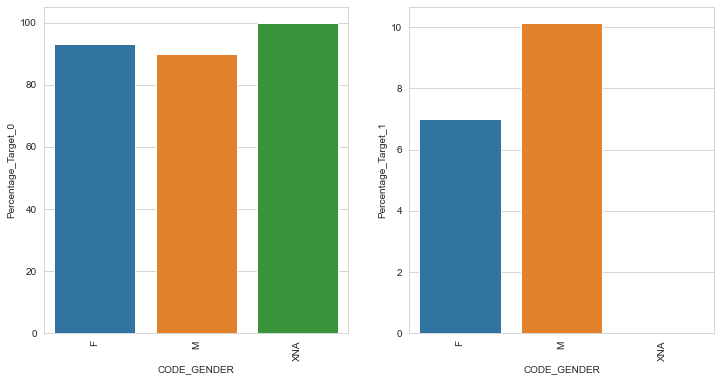

In [35]:
plot_on_categoryvariables(data,'CODE_GENDER')

We can say that the woman tend to repay the loan better than men. So as a recommandation to the bank is to improve the procedure of repayment of loans given to men.

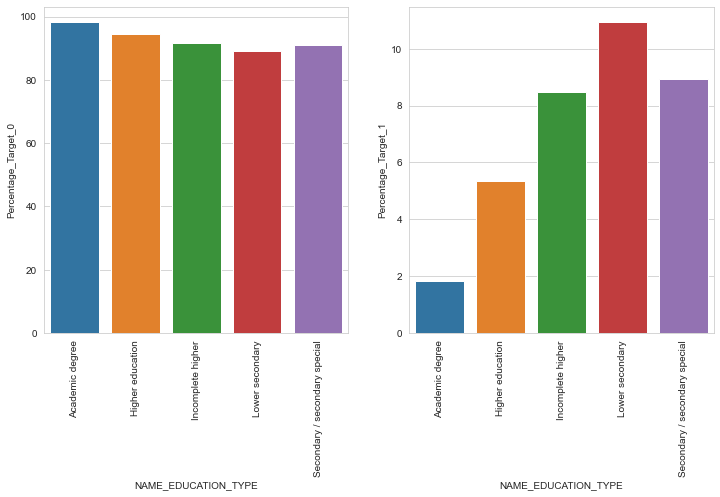

In [36]:
plot_on_categoryvariables(data,'NAME_EDUCATION_TYPE')

For the second question, poeple with a low education level shows the most defaulters ,in the first place people with less than secondary school. Also people with a hight education level are less prone to default. This feature show a significative difference of the distributions of defaulter and non defaulter so it will be helpfull for the modeling task.

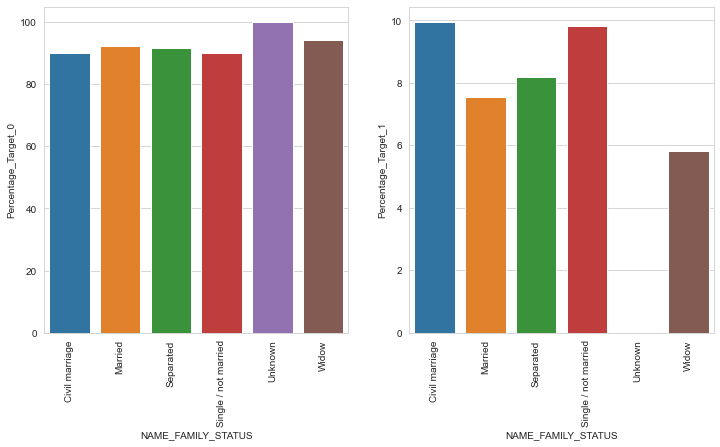

In [37]:
plot_on_categoryvariables(data,'NAME_FAMILY_STATUS')

For the third question, widow category are the least defaulder and the civil marriage category are the most defaulter category ,and this can be explained with the high amout of expences for families so they maight face problems in paying their annuity.

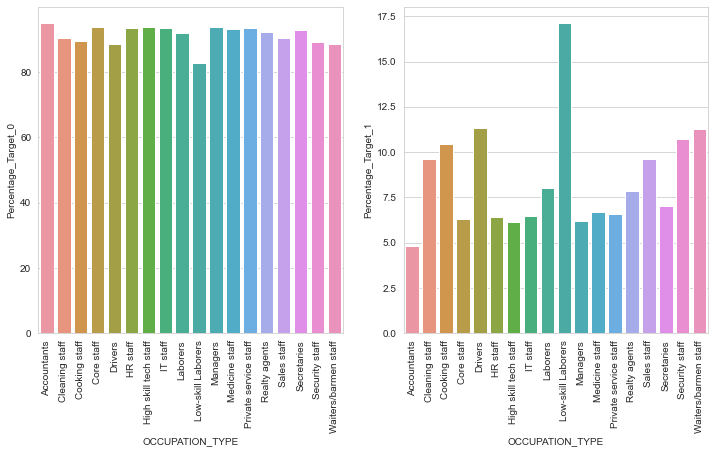

In [38]:
plot_on_categoryvariables(data,'OCCUPATION_TYPE')

We can see that low_skill_laborers have the high risk of defaulting.

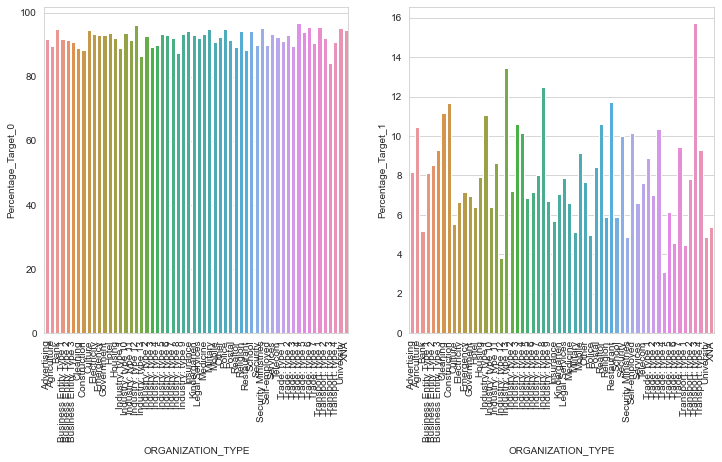

In [39]:
plot_on_categoryvariables(data,'ORGANIZATION_TYPE')

For the forth question ,the most likely category that defaults is the low labores and the less category to default is accountant ,this is very logic.

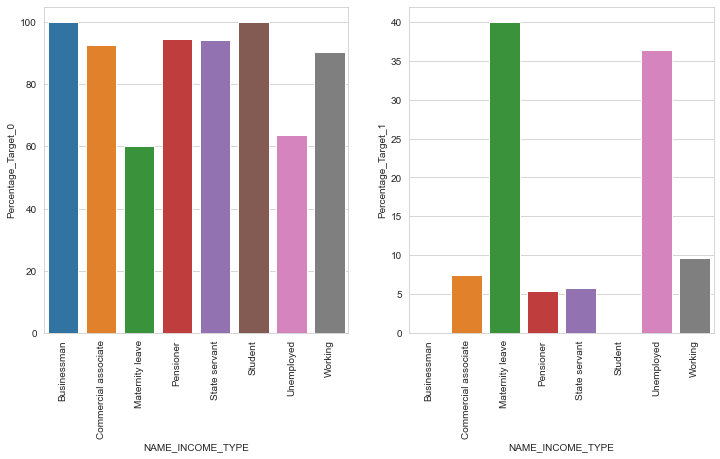

In [40]:
plot_on_categoryvariables(data,'NAME_INCOME_TYPE')

For the fifth question the clients who are on maternity leave and unemployed have the very high risk of defaulting as they don't have income to repay the loans.

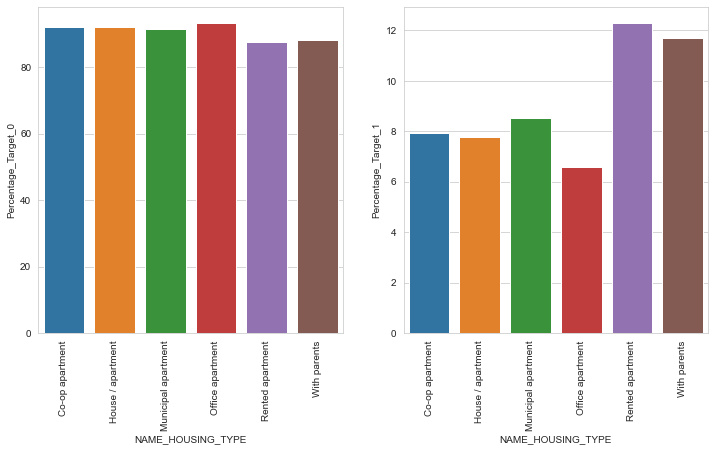

In [41]:
plot_on_categoryvariables(data,'NAME_HOUSING_TYPE')

For the last question the client who are living with parents or in rented appartment have the high risk of default.

## 6. Clean the Test Dataset

Load the test dataset.

In [42]:
testdata=pd.read_csv("application_test.csv") # Loading the dataset.

In [43]:
testdata.head() # Head gives first five rows of the dataset.

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
testdata.tail() # Tail gives last five rows of the dataset.

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


We can see that there 121 columns in the dataset.

In [45]:
testdata.duplicated().sum() # To find duplicates in the test dataset.

0

There are no duplicates in the test dataset.

In [46]:
print(testdata.shape) # To print shape and information about the dataset.
testdata.info()

(48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


The dataset has 121 columns and 48743 rows with 65 float type and 40 int type and 16 object type columns same as train dataset.

Let's remove all the columns which we have removed for the train dataset.

In [47]:
testdata_clean=testdata.drop(highly_missing_features_numeric,axis=1) # Dropping the numeric columns.
testdata_clean.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
testdata_clean=testdata_clean.drop(highly_missing_features_object,axis=1) # Dropping the object columns.
testdata_clean.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


After dropping we can see there are 72 columns equal to the train dataset columns.

Let's see remaining dataset. We can see there are still missing values.

In [49]:
missingdata=(testdata_clean.isna().sum()/len(testdata_clean))
missingdata.sort_values(ascending=False) # Find the percentage of missong values in the other columns in descending order.

OCCUPATION_TYPE                0.320142
EXT_SOURCE_3                   0.177827
AMT_REQ_CREDIT_BUREAU_YEAR     0.124097
AMT_REQ_CREDIT_BUREAU_QRT      0.124097
AMT_REQ_CREDIT_BUREAU_MON      0.124097
                                 ...   
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
Length: 72, dtype: float64

Columns have nearly 32% while other columns have nearly 17% to 12% missing values. Let's impute median values to numeric and mode to values to object type columns as we did for train dataset.

In [50]:
for column in testdata_clean.columns:
    if testdata_clean[column].dtype == 'object':
        testdata_clean[column] = testdata_clean[column].fillna(testdata_clean[column].mode().iloc[0]) # Impute with mode for object columns.
    else:
        testdata_clean[column] = testdata_clean[column].fillna(testdata_clean[column].median())# Impute with median for numeric columns.

In [51]:
missingdata=(testdata_clean.isna().sum()/len(testdata_clean))  # Let's see any missing values are present.
missingdata.sort_values(ascending=False)

SK_ID_CURR                    0.0
NAME_CONTRACT_TYPE            0.0
FLAG_DOCUMENT_8               0.0
FLAG_DOCUMENT_7               0.0
FLAG_DOCUMENT_6               0.0
                             ... 
FLAG_CONT_MOBILE              0.0
FLAG_WORK_PHONE               0.0
FLAG_EMP_PHONE                0.0
FLAG_MOBIL                    0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 72, dtype: float64

We can see after imputing the missing there are no missing values.

In [52]:
testdata_clean.to_csv(r'/Users/u1451275/Downloads/testdata.csv', index=False)

## 7. Transactional Data Analysis.

In [53]:
bureaudata=pd.read_csv("bureau.csv") # Importing the bureau.csv dataset.

In [54]:
bureaudata.head() # Displays first 5 rows of the dataset.

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [55]:
missingdata=(bureaudata.isna().sum()/len(bureaudata)) # Finding any missing values.
missingdata.sort_values(ascending=False)

AMT_ANNUITY               0.714735
AMT_CREDIT_MAX_OVERDUE    0.655133
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_DEBT       0.150119
DAYS_CREDIT_ENDDATE       0.061496
AMT_CREDIT_SUM            0.000008
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
SK_ID_BUREAU              0.000000
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
SK_ID_CURR                0.000000
dtype: float64

We can see that there are 71% missing values for AMT_ANNUITY and 65% missing values for AMT_CREDIT_MAX_OVERDUE. Since we wont use the bureau data in modeling their is no need to drop those columns.

Now we impute the missing values with mode for object type columns and median for numberic type columns.

In [56]:
for column in bureaudata.columns:  # Imputing with mode and median for missing values.
    if bureaudata[column].dtype == 'object':
        bureaudata[column] = bureaudata[column].fillna(bureaudata[column].mode().iloc[0])
    else:
        bureaudata[column] =bureaudata[column].fillna(bureaudata[column].median())

In [57]:
bureaudata['SK_ID_CURR'].duplicated().sum() # Any duplicated rows.

1410617

We can see that there are duplicates in the SK_ID_CURR column.

In [58]:
missingdata=(bureaudata.isna().sum()/len(bureaudata)) # Any missing values after imputing.
missingdata.sort_values(ascending=False)

SK_ID_CURR                0.0
CNT_CREDIT_PROLONG        0.0
DAYS_CREDIT_UPDATE        0.0
CREDIT_TYPE               0.0
AMT_CREDIT_SUM_OVERDUE    0.0
AMT_CREDIT_SUM_LIMIT      0.0
AMT_CREDIT_SUM_DEBT       0.0
AMT_CREDIT_SUM            0.0
AMT_CREDIT_MAX_OVERDUE    0.0
SK_ID_BUREAU              0.0
DAYS_ENDDATE_FACT         0.0
DAYS_CREDIT_ENDDATE       0.0
CREDIT_DAY_OVERDUE        0.0
DAYS_CREDIT               0.0
CREDIT_CURRENCY           0.0
CREDIT_ACTIVE             0.0
AMT_ANNUITY               0.0
dtype: float64

We can see that now there are no missing values.

We can see the SK_ID_CURR values are duplicated so we need to have aggregated values for numeric columns and mode or max for object columns.

In [59]:
aggregated_transaction_data = bureaudata.groupby("SK_ID_CURR")["AMT_CREDIT_SUM"].mean().reset_index()
aggregated_transaction_data  # Mean of AMT_CREDIT_SUM for each unique SK_ID_CURR.

,SK_ID_CURR,AMT_CREDIT_SUM
0,100001,2.076236e+05
1,100002,1.081319e+05
2,100003,2.543501e+05
3,100004,9.451890e+04
4,100005,2.190420e+05
...,...,...
305806,456249,2.841430e+05
305807,456250,1.028820e+06
305808,456253,9.900000e+05
305809,456254,4.500000e+04


Now we get AMT_CREDIT_SUM column mean for every SK_ID_CURR.

In [60]:
data1=data

In [61]:
# Merging aggregated_transaction_data with the train dataset.
df = data1.merge(aggregated_transaction_data, on="SK_ID_CURR", how="left") 

Merging the aggregated AMT_CREDIT_SUM with the train dataset.

In [62]:
df.duplicated().sum()

0

There are no duplicated rows in the new merged dataset.

In [63]:
df['SK_ID_CURR'].duplicated().sum()

0

There are no duplicated SK_ID_CURR

In [64]:
missingdata=(df.isna().sum()/len(df))
missingdata.sort_values(ascending=False) # Checking if any missing values in the merged dataset.

AMT_CREDIT_SUM            0.143149
FLAG_DOCUMENT_10          0.000000
FLAG_DOCUMENT_8           0.000000
FLAG_DOCUMENT_7           0.000000
FLAG_DOCUMENT_6           0.000000
                            ...   
FLAG_CONT_MOBILE          0.000000
FLAG_WORK_PHONE           0.000000
FLAG_EMP_PHONE            0.000000
FLAG_MOBIL                0.000000
REG_CITY_NOT_WORK_CITY    0.000000
Length: 74, dtype: float64

Now we can see AMT_CREDIT_SUM have 14% missing values in the merged dataset. We impute them with median values.

In [65]:
df['AMT_CREDIT_SUM']=df['AMT_CREDIT_SUM'].fillna(df['AMT_CREDIT_SUM'].median()) # Median imputation.

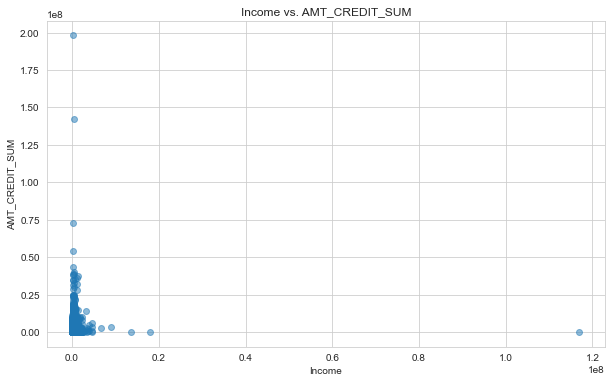

In [66]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["AMT_INCOME_TOTAL"], df['AMT_CREDIT_SUM'], alpha=0.5)
plt.title("Income vs. AMT_CREDIT_SUM")
plt.xlabel("Income")
plt.ylabel("AMT_CREDIT_SUM")
plt.grid(True)
plt.show()


We plot the scatter plot with the income and AMT_CREDIT_SUM and we can see that the plot is not clearly visible. So, we can remove some outliers and plot the data around the 0.0 to 0.1 on income axis and 0.00 to 0.50 on the AMT_CREDIT_SUM axis.

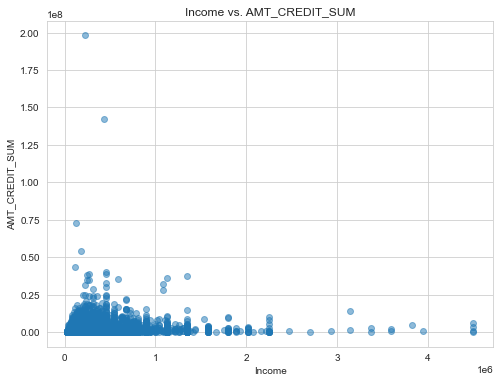

In [67]:
df_income = df[df['AMT_INCOME_TOTAL'] < 5000000]
df_income = df_income[df_income['AMT_CREDIT_SUM'] < 200000000]
plt.figure(figsize=(8, 6))
plt.scatter(df_income['AMT_INCOME_TOTAL'], df_income['AMT_CREDIT_SUM'], alpha=0.5)
plt.title("Income vs. AMT_CREDIT_SUM")
plt.xlabel("Income")
plt.ylabel("AMT_CREDIT_SUM")
plt.grid(True)
plt.show()


We can see that the Income and ANT_CREDIT_SUM are not correlated. And we can say the process of getting loan for small amounts is easy when compared to large amounts. So, even though some of the clients have high income but they have low AMT_CREDIT_SUM.

In [68]:
aggregated_transaction_data_limit = bureaudata.groupby("SK_ID_CURR")["AMT_CREDIT_SUM_LIMIT"].mean().reset_index()
aggregated_transaction_data_limit # Mean of AMT_CREDIT_SUM_LIMIT for each unique SK_ID_CURR.

,SK_ID_CURR,AMT_CREDIT_SUM_LIMIT
0,100001,0.000000
1,100002,3998.570625
2,100003,202500.000000
3,100004,0.000000
4,100005,0.000000
...,...,...
305806,456249,0.000000
305807,456250,19422.795000
305808,456253,0.000000
305809,456254,0.000000


Now we get AMT_CREDIT_SUM_LIMIT column mean for every SK_ID_CURR.

In [69]:
df_limit = df.merge(aggregated_transaction_data_limit, on="SK_ID_CURR", how="left")
# meging the merged dataset with the AMT_CREDIT_SUM_LIMIT dataset.

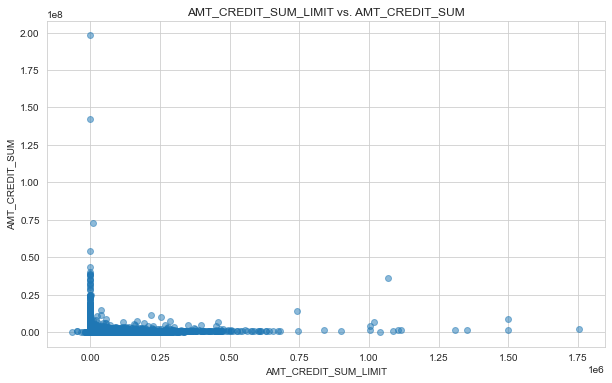

In [70]:

# Extract the columns of interest
amt_credit_limit = df_limit["AMT_CREDIT_SUM_LIMIT"]
amt_credit_sum = df_limit["AMT_CREDIT_SUM"]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(amt_credit_limit, amt_credit_sum, alpha=0.5)
plt.title("AMT_CREDIT_SUM_LIMIT vs. AMT_CREDIT_SUM")
plt.xlabel("AMT_CREDIT_SUM_LIMIT")
plt.ylabel("AMT_CREDIT_SUM")
plt.grid(True)
plt.show()


There is no proper relation between AMT_CREDIT_SUM_LIMIT and AMT_CREDIT_SUM as some have high limit but only borrow very low credit.

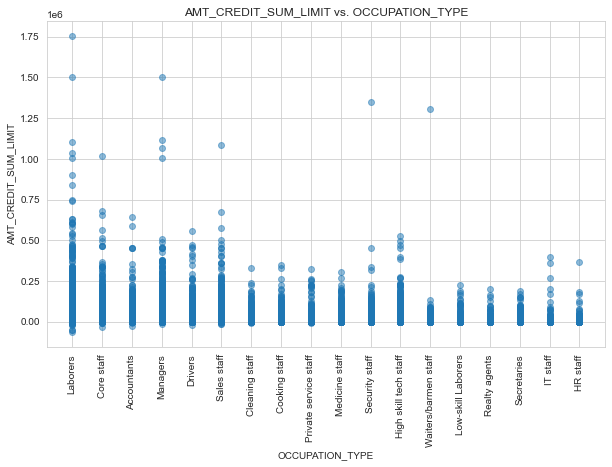

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df_limit['OCCUPATION_TYPE'], df_limit["AMT_CREDIT_SUM_LIMIT"], alpha=0.5)
plt.title("AMT_CREDIT_SUM_LIMIT vs. OCCUPATION_TYPE")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("AMT_CREDIT_SUM_LIMIT")
plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()


We can see that Laborers, corestaff, Managers, sales staff, high skilled staff have high AMT_CREDIT_SUM_LIMIT wheresa waiters have low limit.

In [72]:
type_data = bureaudata.groupby("CREDIT_TYPE")["AMT_CREDIT_SUM"].mean().reset_index()
type_data

,CREDIT_TYPE,AMT_CREDIT_SUM
0,Another type of loan,3.494395e+05
1,Car loan,1.823916e+06
2,Cash loan (non-earmarked),5.414571e+05
3,Consumer credit,3.061117e+05
4,Credit card,1.724684e+05
5,Interbank credit,1.350000e+04
6,Loan for business development,1.462141e+06
7,Loan for purchase of shares (margin lending),3.334500e+06
8,Loan for the purchase of equipment,4.432927e+06
9,Loan for working capital replenishment,1.559215e+06


In the above summary table we get AMT_Credit_Sum based on the Credit_Type.

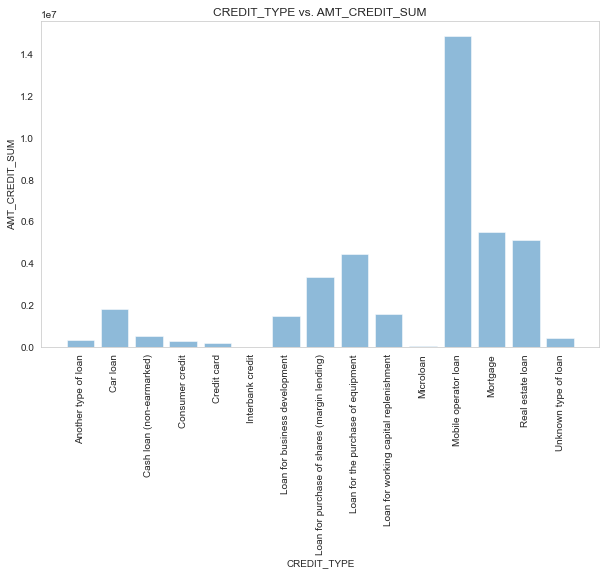

In [73]:
plt.figure(figsize=(10, 6)) # Bar plot of the CREDIT_TYPE vs. AMT_CREDIT_SUM
plt.bar(type_data['CREDIT_TYPE'], type_data['AMT_CREDIT_SUM'], alpha=0.5)
plt.title("CREDIT_TYPE vs. AMT_CREDIT_SUM")
plt.xlabel("CREDIT_TYPE")
plt.ylabel("AMT_CREDIT_SUM")
plt.xticks(rotation='vertical')
plt.grid(False)
plt.show()

From the plot we can say that Mobile operator loan has high amount of creditsum along with mortage and real estate loans.

In [74]:
type_data_id = bureaudata.groupby("SK_ID_CURR")["CREDIT_TYPE"].max().reset_index()
type_data_id  # Majority type of loans for the applicants.

,SK_ID_CURR,CREDIT_TYPE
0,100001,Consumer credit
1,100002,Credit card
2,100003,Credit card
3,100004,Consumer credit
4,100005,Credit card
...,...,...
305806,456249,Credit card
305807,456250,Credit card
305808,456253,Credit card
305809,456254,Consumer credit


In [75]:
df_limit = df_limit.merge(type_data_id, on="SK_ID_CURR", how="left") 
# Merging the dataset with the previous merged dataset.

In [76]:
df_type=df_limit.groupby("CREDIT_TYPE")["AMT_INCOME_TOTAL"].mean().reset_index()

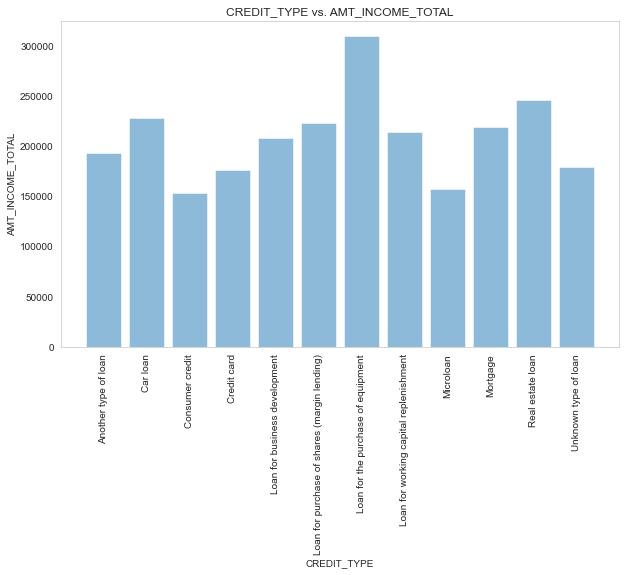

In [77]:
plt.figure(figsize=(10, 6))  # Bar plot of the CREDIT_TYPE vs. AMT_INCOME_TOTAL
plt.bar(df_type['CREDIT_TYPE'], df_type['AMT_INCOME_TOTAL'], alpha=0.5)
plt.title("CREDIT_TYPE vs. AMT_INCOME_TOTAL")
plt.xlabel("CREDIT_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
plt.xticks(rotation='vertical')
plt.grid(False)
plt.show()

We can see that the clients who took loan for the purchase of equipment has high income along with real estate and car loans whereas credit card, consumer loans, micro loan clients have low income.

## 8. Conclusion

To conclude for this EDA we find the following:

There is a significant class imbalance in the dataset, with a small number of defaults compared to non-defaults. Concluding this imbalance is important as it can affect model training and evaluation strategies.

There are some missing values in the dataset and some columns has as high as nearly 70% missing values.

We removed the missing values which are 45% of the column are missing values and imputed the remaining with the median or mode based on the numeric or object type columns.

Dataset contains some outliers and we remove the outliers that doen't have ant meaning using the IQR (Inter Quartile Range) like column 'DAYS_EMPLOYED'.

The correlation between the TARGET column with other variable has for EXT_SOURCE_2 and EXT_SOURCE_3 have strong negative correlation of -0.160 and -0.155 respectively whereas DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH, REG_CITY_NOT_WORK_CITY have a positive correlation of around 0.05-0.07.

The hypothesis testing gave some conclusions like large amount of credit is not the cause of defaulting, income doesn't have effect on the default and woman tend to less likely default when compared to men, and maternity leave clients along with unemployed tend to default much more.

In the transactional data analysis we brought new dataset bureau to do some analysis. We merged the some aggregated columns from the bureau data with the train dataset and did some plot and summary table analysis with credit typre, credit sum limit, amt credit sum.
